# Performance

In [1]:
#imported python packages
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pickle
import joblib
from sklearn.preprocessing import RobustScaler

In [2]:
# import dataset about train dataset 
train_df = pd.read_csv("train_df.csv")

In [3]:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 572 entries, segment_id to sensor_10_abs_1500_max
dtypes: float64(570), int64(2)
memory usage: 3.3 MB


,segment_id,time_to_eruption,sensor_1_mad,sensor_2_mad,sensor_3_mad,sensor_4_mad,sensor_5_mad,sensor_6_mad,sensor_7_mad,sensor_8_mad,...,sensor_1_abs_1500_max,sensor_2_abs_1500_max,sensor_3_abs_1500_max,sensor_4_abs_1500_max,sensor_5_abs_1500_max,sensor_6_abs_1500_max,sensor_7_abs_1500_max,sensor_8_abs_1500_max,sensor_9_abs_1500_max,sensor_10_abs_1500_max
0,1064935255,47950543,427.776378,623.697210,341.073573,433.849701,289.211797,764.413905,44.183687,68.358305,...,22922.0,21691.0,10264.000000,9915.0,46270.0,23693.0,47421.0,1260.0,9606.0,22251.0
1,1323724621,47861879,257.130834,471.174757,215.762815,219.545632,141.919199,640.298186,261.960275,482.226406,...,27299.0,25259.0,26185.000000,25994.0,25354.0,50804.0,19320.0,55973.0,25736.0,25739.0
2,1581535482,47810569,493.354956,207.232992,171.991627,284.738940,79.524836,1770.305228,467.666062,688.694534,...,8187.0,56897.0,35346.400000,8595.0,12648.0,57834.0,8640.0,9252.0,8909.0,38587.0
3,594908465,47775708,518.765458,705.686148,432.852295,452.531715,179.587543,1270.945471,44.843274,66.518934,...,42362.0,40367.0,41805.000000,2081.0,50579.0,11868.0,38611.0,49984.0,41854.0,51499.0
4,995669347,47715187,177.028725,224.951322,282.077704,211.051018,79.563309,623.316076,388.258728,484.273435,...,45312.0,57382.0,22462.000000,16902.0,17995.6,29837.0,39494.0,36672.0,22371.5,53085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,82371649,273119,632.813205,874.526694,675.669753,646.072554,237.954403,580.591656,553.386559,555.799454,...,24752.0,46245.0,49642.000000,49571.0,18261.0,31259.0,50917.0,36587.0,52567.0,18859.0
753,1301215104,223909,431.525120,703.002077,466.305727,330.091944,275.156617,283.346580,506.428935,316.107505,...,39574.0,59996.0,31919.000000,13284.0,18709.0,1800.0,58188.0,9677.0,39845.0,38291.0
754,372844561,179818,579.081600,842.940727,555.487845,549.747417,177.285175,1649.068075,799.161800,1121.988671,...,53022.0,54602.0,10317.000000,56921.0,22012.2,46310.0,57185.0,32599.0,55057.0,10479.0
755,442994108,28696,297.945463,366.545544,273.043050,267.871366,82.775953,377.133225,497.667999,607.939568,...,28322.5,12372.0,18943.666667,6870.5,12725.0,57079.0,49155.0,36264.0,13074.0,13146.0


In [4]:
# import dataset about test dataset
test_df = pd.read_csv("test_df.csv")

In [5]:
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Columns: 571 entries, segment_id to sensor_10_abs_1500_max
dtypes: float64(570), int64(1)
memory usage: 3.2 MB


,segment_id,sensor_1_mad,sensor_2_mad,sensor_3_mad,sensor_4_mad,sensor_5_mad,sensor_6_mad,sensor_7_mad,sensor_8_mad,sensor_9_mad,...,sensor_1_abs_1500_max,sensor_2_abs_1500_max,sensor_3_abs_1500_max,sensor_4_abs_1500_max,sensor_5_abs_1500_max,sensor_6_abs_1500_max,sensor_7_abs_1500_max,sensor_8_abs_1500_max,sensor_9_abs_1500_max,sensor_10_abs_1500_max
0,53465103,268.929478,845.652027,249.931899,307.519773,208.797820,412.618668,295.700384,445.645529,329.119838,...,14641.0,13749.0,12852.0,12974.0,14099.000000,2082.0,2377.0,58944.000000,14338.0,14424.0
1,638074752,2770.332472,470.681350,2796.724210,753.785456,1079.451422,1859.525892,954.842023,1269.317627,3386.048387,...,29594.0,7457.0,59386.0,24476.0,23399.500000,4031.0,36807.0,39762.000000,27731.5,9522.0
2,106558646,5271.735466,7949.787591,5199.150380,5336.574388,1950.105024,2370.015884,2569.982972,2335.088533,6442.976936,...,44547.0,265.0,6206.0,38681.0,32700.000000,161.0,33822.0,44454.000000,41125.0,4620.0
3,12479934,367.796127,301.395992,2732.669633,277.582783,112.783708,1469.755578,396.360013,646.696491,289.958741,...,26626.0,38826.0,19095.0,13702.0,21122.000000,38912.0,30490.0,21142.000000,59707.0,26512.0
4,580521026,274.803808,349.466766,266.188887,257.445832,138.111164,564.599431,380.530281,619.309145,268.149731,...,9967.0,9451.0,31984.0,10376.0,9544.000000,12314.0,33097.0,33731.000000,10111.0,31950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1265147,316.318664,382.821071,1316.548666,284.283004,146.391247,373.101000,255.202518,273.068444,345.852474,...,40059.5,40177.0,11203.0,21320.0,3346.500000,41686.0,45020.0,41715.000000,40238.5,36948.0
724,115078097,476.088899,575.937473,390.164140,408.668268,138.693181,1323.645391,42.084348,51.654795,407.284503,...,53321.0,51729.0,53249.0,53046.0,4165.333333,12000.0,49137.0,49137.000000,53258.0,52472.0
725,577108378,333.072465,355.749551,1079.560395,330.765043,147.033728,427.875003,238.444549,282.552092,315.671909,...,29947.5,44448.0,33790.0,37123.0,4984.166667,532.0,28323.5,37714.333333,29708.0,29178.5
726,108980580,190.056032,355.749551,164.081338,222.079556,155.374275,204.583304,169.741851,325.657581,224.059314,...,6574.0,44448.0,6325.0,6402.0,5803.000000,6441.5,7510.0,26291.666667,6158.0,5885.0


In [6]:
# Splitting dataset into train, validation and test 
X_train = train_df.drop(['time_to_eruption','segment_id'], axis=1)
Y_train = train_df['time_to_eruption']
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20)
X_test = test_df.drop(['segment_id'], axis=1)

In [7]:
fs = ["_mad","_skew","_kurt","_nunique",
      "_quantile_05","_quantile_10","_quantile_30","_quantile_70","_quantile_90","_quantile_95",
      "_fft_power_mean","_fft_power_std","_fft_power_min","_fft_power_max",
      "_fft_power_sum_low","_fft_power_sum_middle","_fft_power_sum_high",
      "_fft_power_mad","_fft_power_skew","_fft_power_kurt","_fft_power_nunique",
      "_fft_power_quantile_05","_fft_power_quantile_10","_fft_power_quantile_30","_fft_power_quantile_70",
      "_fft_power_quantile_90","_fft_power_quantile_95",
      "_roll_mean_min","_roll_mean_max","_roll_dist_min","_roll_dist_max","_roll_dist_diff_min","_roll_dist_diff_max"
     ]

cols = [f"sensor_{i}{_fs}" for i in range(1,11) for _fs in fs]


# Instantiate the RobustScaler object
scale_X = RobustScaler()
# Scale X
X_train = pd.DataFrame(scale_X.fit_transform(X_train[cols]),index=X_train.index,columns=cols)
X_val = pd.DataFrame(scale_X.fit_transform(X_val[cols]),index=X_val.index,columns=cols)
X_test  = pd.DataFrame(scale_X.transform(X_test[cols]),index=X_test.index ,columns=cols)

In [8]:
# XGB model loaded
xgb_model = joblib.load('xgb_model.joblib')

In [9]:
# get the predictions for the validation data
Y_pred_xgb = xgb_model.predict(X_val)

In [10]:
# transforming Y_val dataframe to numpy array
Y_valid = Y_val.to_numpy()
Y_valid = Y_valid.flatten()
Y_valid

array([13507919, 41626356, 40819831,  4883180, 13249370,  7954212,
       43798513,  7267557, 30949149, 28588026,  3930776,  4337116,
       18743399, 17158125, 20111279, 34598467, 24622916, 41038586,
       28213217,  1993608,  1378995, 20686189, 15126522, 44789145,
        3264638,  5270014, 18740213,  3544851, 41255182, 40065339,
        2193658,  7412828, 13711404, 24292830, 34189936, 42271195,
       24532642, 40698380, 43395620, 36217712, 30130135, 29104309,
       27645115, 29619667,  3456892,  7457448,  7843656,  4012852,
       15009926, 25054246, 29462986, 22264866, 44621939,  4931804,
       31870009, 41641143,   690499, 11536123, 17255974, 10264626,
       28256064,  7252237,  2463684,  1856847, 17383128, 45749086,
       38327442, 36048263, 39663358, 10670472, 11719563,  3488666,
       12494503, 38733309, 43617392, 16425646, 15546942, 47013253,
       28772117,  6859938, 14285865, 16095563, 47950543, 25031879,
        1337830,   925464, 25695460,  1751151, 13124526, 31497

In [11]:
# array created for the difference between valid and test prediction
accuracy_xgb = ((Y_pred_xgb-Y_valid)/Y_valid)

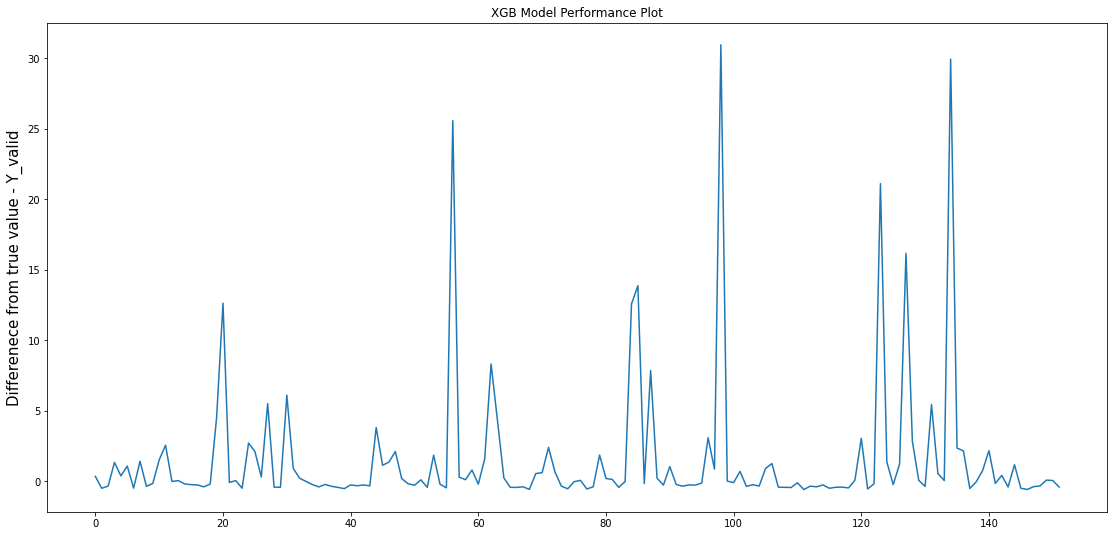

In [12]:
# performnace plot for xgb
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_xgb)
plt.title("XGB Model Performance Plot")
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

In [13]:
# RandomForest model loaded
rf_model = joblib.load('rf_model.joblib')

In [14]:
# get the predictions for the validation data
Y_pred_rf = rf_model.predict(X_val)

In [15]:
# array created for the difference between valid and test prediction
accuracy_rf = ((Y_pred_rf-Y_valid)/Y_valid)

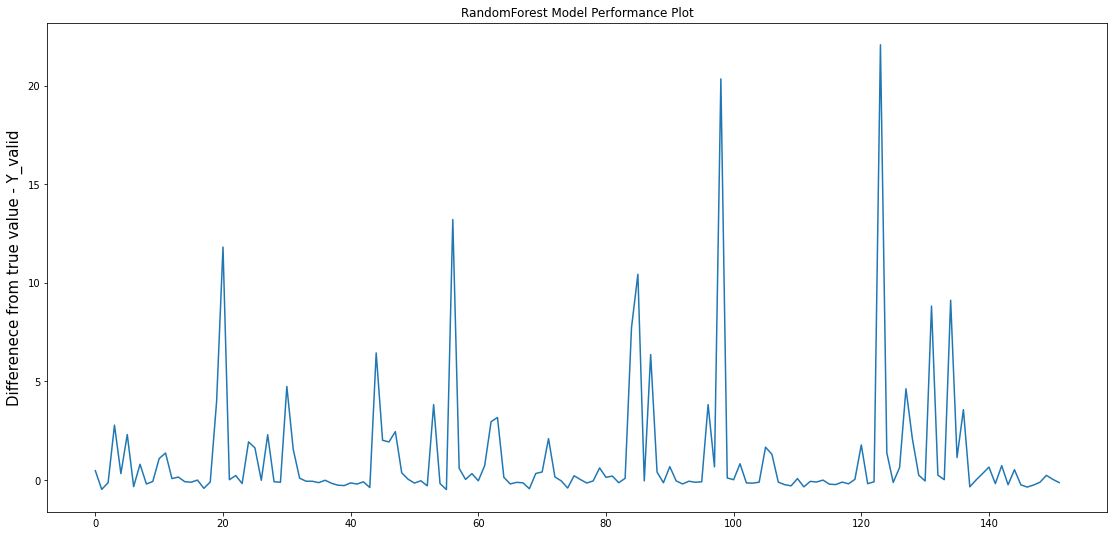

In [16]:
# performnace plot for RandomForest
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_rf)
plt.title("RandomForest Model Performance Plot")
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

### From the plots above RandomForest has better prediction because the difference between true and predicted value is smaller than XGB Model but still some variation is seen. While XGBRegressor Model has more variation than RandomForest plot. 